In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to python environment

In [2]:
data=pd.read_excel(r"C:\Users\yedhu\OneDrive\Desktop\iris (2).xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Doing the necessary pre-processing steps

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Handling missing values

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
SL_mean = data['SL'].mean()
SW_mean = data['SW'].mean()
PL_mean = data['PL'].mean()

In [11]:
SL_mean

5.8559440559440565

In [12]:
SW_mean

3.0493055555555566

In [13]:
PL_mean

3.756250000000003

In [14]:
#Filling in all the missing values with mean
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].mean())

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers

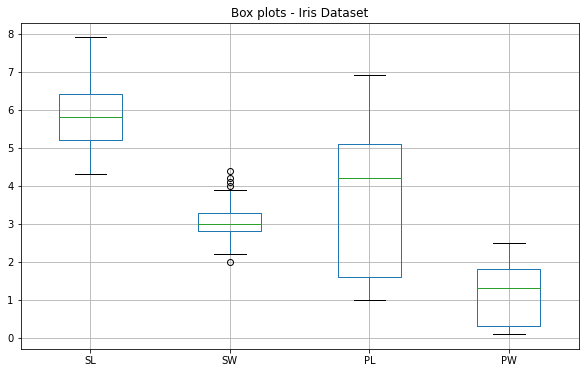

In [16]:
#Box plots - Iris Dataset
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title("Box plots - Iris Dataset")
plt.show()

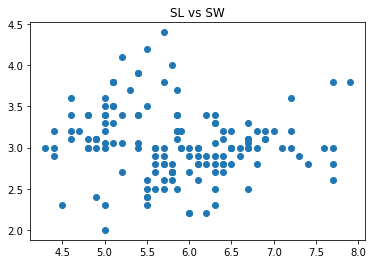

<Figure size 720x576 with 0 Axes>

In [17]:
#Scatter Plots
plt.scatter(data['SL'],data['SW'])
plt.title('SL vs SW')
plt.figure(figsize=(10, 8))
plt.show()

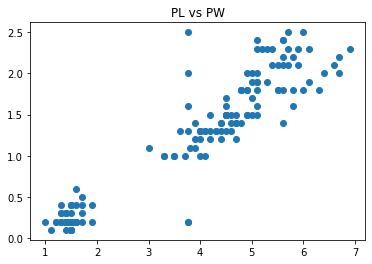

<Figure size 720x576 with 0 Axes>

In [18]:
plt.scatter(data['PL'],data['PW'])
plt.title('PL vs PW')
plt.figure(figsize=(10, 8))
plt.show()

In [19]:
# Calculating IQR for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [20]:
IQR

SL    1.200
SW    0.475
PL    3.500
PW    1.500
dtype: float64

In [21]:
# Determining potential outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
# Identifing the potential outliers
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

C:\Users\yedhu\AppData\Local\Temp\ipykernel_18032\4030575397.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)


In [23]:
outlier_rows = data[outliers]

In [24]:
outlier_rows

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [25]:
#Removing the outliers
data1 = data.drop([14,15,32,33,60])

In [26]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [27]:
data1.shape

(145, 5)

# Min Max Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
x = data1.drop('Classification', axis=1)
y = data1['Classification']

In [30]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
type(x_scaled)

numpy.ndarray

In [32]:
data2 = pd.DataFrame(x_scaled, columns=x.columns)

In [33]:
data2.head()

,SL,SW,PL,PW
0,0.222222,0.764706,0.067797,0.041667
1,0.166667,0.470588,0.067797,0.041667
2,0.432207,0.588235,0.050847,0.041667
3,0.083333,0.529412,0.084746,0.041667
4,0.194444,0.823529,0.067797,0.041667


# Encoding

In [34]:
# Performing one-hot encoding
data2 = pd.get_dummies(data1)

In [35]:
data2

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.100000,3.5,1.40000,0.2,1,0,0
1,4.900000,3.0,1.40000,0.2,1,0,0
2,5.855944,3.2,1.30000,0.2,1,0,0
3,4.600000,3.1,1.50000,0.2,1,0,0
4,5.000000,3.6,1.40000,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,0,0,1
146,6.300000,2.5,5.00000,1.9,0,0,1
147,6.500000,3.0,3.75625,2.0,0,0,1
148,6.200000,3.4,5.40000,2.3,0,0,1


# 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)


In [36]:
#correlation matrix
corr_matrix = data2.corr()

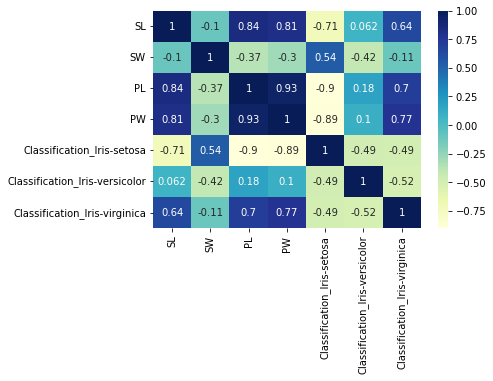

In [37]:
# Visualizing the correlation matrix using a heatmap
sns.heatmap(corr_matrix,annot = True,cmap='YlGnBu')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

C:\Users\yedhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_predictions=model.predict(x_test)

In [41]:
y_predictions

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [43]:
confusion_matrix(y_test,y_predictions)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [44]:
print('Accuracy=',accuracy_score(y_test,y_predictions))


Accuracy= 0.896551724137931


# K - Nearest Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
metric_k=[]
neighbors=np.arange(3,5)

In [47]:
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [48]:
metric_k

[0.9310344827586207, 0.9310344827586207]

In [49]:
acc

0.9310344827586207

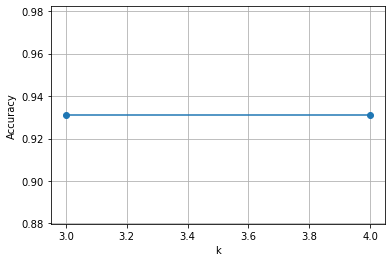

In [50]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

# Decision Trees

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Creating a decision tree classifier
model = DecisionTreeClassifier()

In [53]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = model.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)

In [56]:
accuracy

0.896551724137931

# Random Forests

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier()

In [59]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = model.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)

In [62]:
accuracy

0.9310344827586207